In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
from torchvision.datasets import MNIST

データセットのダウンロード

In [2]:
mnist_data=MNIST("～/data",train=True,download=True,transform=transforms.ToTensor())
data_loader=DataLoader(mnist_data,batch_size=8,shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ～/data/MNIST/raw/train-images-idx3-ubyte.gz to ～/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ～/data/MNIST/raw/train-labels-idx1-ubyte.gz to ～/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ～/data/MNIST/raw/t10k-images-idx3-ubyte.gz to ～/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ～/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ～/data/MNIST/raw



In [3]:
print(len(mnist_data))
print(len(data_loader))

60000
7500


データの中身を確認

In [4]:
data_iterator=iter(data_loader)
images,labels=data_iterator.next()

print(len(images))
print(len(labels))

8
8


データの可視化

(1, 28, 28)
(28, 28)
tensor(9)


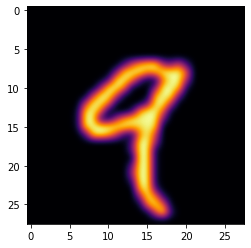

In [8]:
location=4
data=images[location].numpy()
print(data.shape)
reshaped_data=data.reshape(28,28)
print(reshaped_data.shape)
plt.imshow(reshaped_data,cmap="inferno",interpolation="bicubic")
print(labels[location])

学習データと検証データに分割

In [9]:
train_data_with_labels=MNIST("～/data",train=True,download=True,transform=transforms.ToTensor())
train_data_loader=DataLoader(train_data_with_labels,batch_size=8,shuffle=True)

test_data_with_labels=MNIST("～/data",train=False,download=True,transform=transforms.ToTensor())
test_data_loader=DataLoader(test_data_with_labels,batch_size=8,shuffle=True)

In [10]:
print(len(train_data_with_labels))
print(len(train_data_loader))
print(len(test_data_with_labels))
print(len(test_data_loader))

60000
7500
10000
1250


ニューラルネットワークの定義

In [11]:
from torch.autograd import Variable
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(28*28,100)
    self.layer2=nn.Linear(100,50)
    self.layer3=nn.Linear(50,10)

  def forward(self,input_data):
    input_data=input_data.view(-1,28*28)
    input_data=self.layer1(input_data)
    input_data=self.layer2(input_data)
    input_data=self.layer3(input_data)
    return input_data

モデル

In [12]:
model=MLP()

損出関数と最適化手法の定義

In [13]:
import torch.optim as optimizer 
lossResult= nn.CrossEntropyLoss()
optimizer=optimizer.SGD(model.parameters(),lr=0.01)

学習

In [15]:
MAX_EPOCH=4
for epoch in range(MAX_EPOCH):
  for i,data in enumerate(train_data_loader):
    train_data,teacher_labels=data
    train_data,teacher_labels=Variable(train_data),Variable(teacher_labels)
    optimizer.zero_grad()
    #順伝搬
    outputs=model(train_data)
    #損出関数を計算
    loss=lossResult(outputs,teacher_labels)
    #逆伝搬
    loss.backward()
    #重み更新
    optimizer.step()

検証

In [57]:
total=0
count_when_correct=0
import torch
for data in test_data_loader:
  test_data,teacher_labels=data
  test_data,teacher_labels=Variable(test_data),Variable(teacher_labels)
  result=model(test_data)
  _,predicted=torch.max(result.data,1)
  total+=teacher_labels.size(0)
  count_when_correct+=(predicted==teacher_labels).sum()
print("count_when_correct:%d" %(count_when_correct))
print("total:%d"%(total))

count_when_correct:9210
total:10000


個別データで検証

tensor(3)


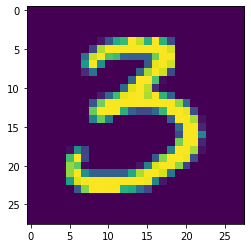

In [78]:
test_iterator=iter(test_data_loader)
test_data,teacher_labels=test_iterator.next()
test_data,teacher_labels=Variable(test_data),Variable(teacher_labels)
result=model(test_data)
_,predicted=torch.max(result.data,1)

location=1
plt.imshow(test_data[location].numpy().reshape(28,28))
print(predicted[location])